In [1]:
from MGTomo import gridop
from MGTomo import optimize 

from MGTomo import gridop_ON

from skimage import data
from skimage.transform import resize
import torch
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
input_matrix = torch.rand(31, 31)
output_matrix = gridop.P(input_matrix)

# Check the shape of the output matrix
print("Output matrix shape:", output_matrix.shape)

Output matrix shape: torch.Size([63, 63])


In [3]:
input_matrix = torch.rand(63, 63)
output_matrix = gridop.R(input_matrix)

# Check the shape of the output matrix
print("Output matrix shape:", output_matrix.shape)

Output matrix shape: torch.Size([31, 31])


In [4]:
x = torch.rand(31,31)
y = torch.rand(63,63)

In [5]:
torch.sum(gridop.R(y)*x)

tensor(3806.8740)

In [6]:
torch.sum(y*gridop.P(x))

tensor(3806.8738)

In [18]:
xh = torch.rand(1023,1023)
xH = gridop.R(xh)

P_inf = 8

lh = torch.zeros_like(xh)
uh = torch.ones_like(xh)

lH, uH = optimize.box_bounds(xh, xH, P_inf, lh, uh)

In [19]:
from torch.profiler import profile, ProfilerActivity, record_function

In [20]:
with profile(activities=[ProfilerActivity.CPU], record_shapes=True) as prof:
    with record_function("box_bounds"):
        optimize.box_bounds(xh, xH, P_inf, lh, uh)

: 

In [ ]:
print(prof.key_averages().table(sort_by="cpu_time_total", row_limit=10))

In [8]:
torch.all(xh + gridop.P(lH -xH) >= lh)

tensor(True)

In [9]:
torch.all(xh + gridop.P(xH-uH) <= uh)

tensor(True)

In [10]:
torch.all(xH > lH)

tensor(True)

In [11]:
torch.all(xH < uH)

tensor(True)

In [12]:
torch.all(gridop.P(lH-xH) <= gridop.P(uH-xH))

tensor(True)

In [13]:
(gridop.R(gridop.P(x)) - x).abs().max()

tensor(54.1644)

In [14]:
y

tensor([[0.5403, 0.2836, 0.6028,  ..., 0.6643, 0.4399, 0.0300],
        [0.8208, 0.5880, 0.4540,  ..., 0.3446, 0.0170, 0.4338],
        [0.4603, 0.5264, 0.0344,  ..., 0.8516, 0.7542, 0.1985],
        ...,
        [0.2860, 0.1863, 0.4639,  ..., 0.0383, 0.5753, 0.2313],
        [0.8944, 0.1295, 0.8838,  ..., 0.9558, 0.1862, 0.5574],
        [0.6502, 0.7840, 0.3907,  ..., 0.1867, 0.8830, 0.8672]])

In [15]:
N = 511
# load image
x_orig = data.camera()
x_orig = resize(x_orig, (N,N), anti_aliasing = False).astype(np.float32)

x_torch = torch.tensor(x_orig, requires_grad = True)

In [16]:
Rx = gridop.RBox(x_torch)

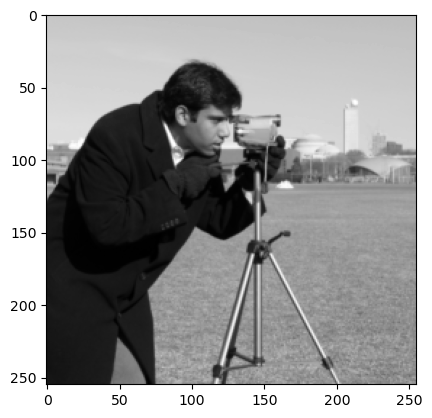

In [17]:
plt.imshow(Rx.detach().numpy(), cmap = 'gray')